In [1]:
from UTILITY_quickstart import *
import yaml

with open('setLattice_defaults.yml', 'r') as file:
    importedDefaultSettings = yaml.safe_load(file)

In [2]:
csrTF = True


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e5,
)

trackBeam(tao, centerBC14 = True, centerBC20 = True, centerMFFF = True, verbose = True)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 100000.0
Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = end
Set track_end = BEGBC14_1
Tracking!
Beam centered at BEGBC14 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC14_1, track_end = end
Set track_end = BEGBC20
Tracking!
Beam centered at BEGBC20 written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = BEGBC20, track_end = end
Set track_end = MFFF
Tracking!
Beam centered at MFFF written to patchBeamFile.h5
Loaded patchBeamFile.h5
Set track_start = MFFF, track_end = end
Tracking!
trackBeam() exiting


In [3]:
P_BEGBC20 = getBeamAtElement(tao, "BEGBC20")
P_MFFF = getBeamAtElement(tao, "MFFF")
P_PENT = getBeamAtElement(tao, "PENT")
P_DTOTR = getBeamAtElement(tao, "DTOTR")

allBeams = { "BEGBC20" : P_BEGBC20, "MFFF" : P_MFFF, "PENT" : P_PENT, "DTOTR" : P_DTOTR } 

(getBeamAtElement(tao, "PENT")).write("optimizerRunningBestBeam_PENT.h5")

DTOTR


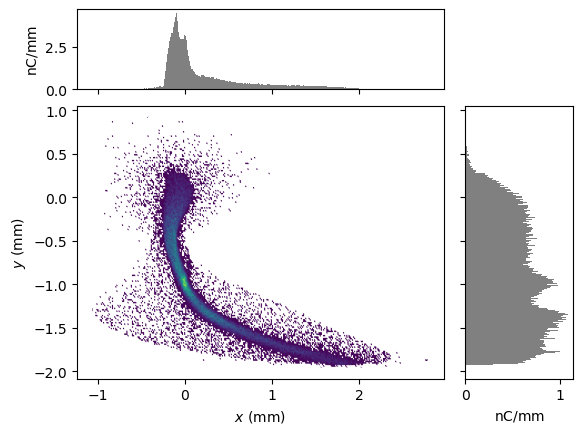

PENT


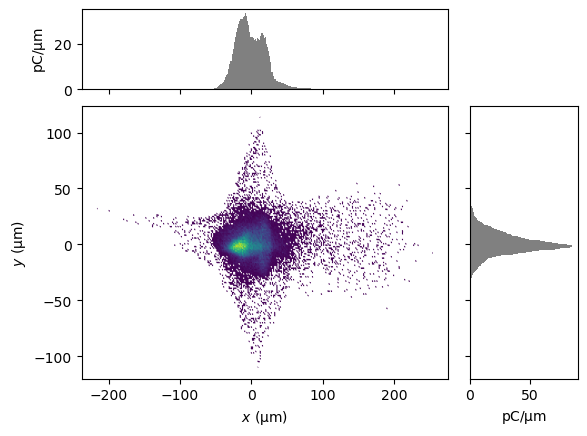

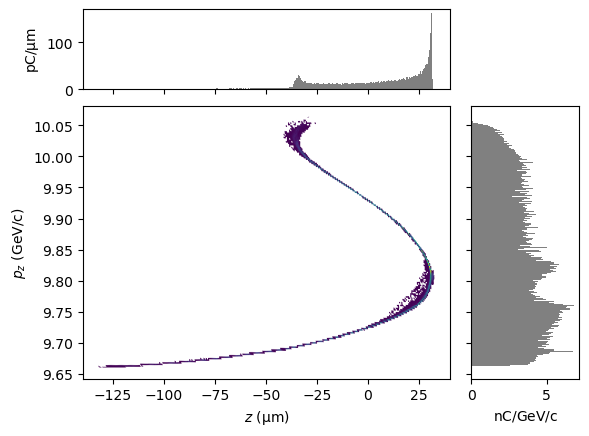

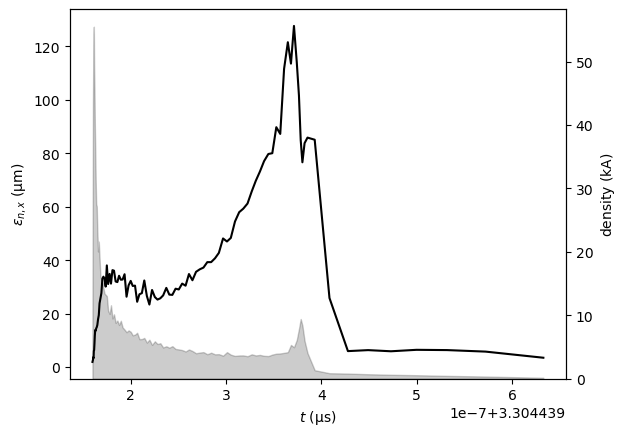

<Figure size 640x480 with 0 Axes>

In [4]:
print("DTOTR")
display(plotMod(P_DTOTR, 'x', 'y',  bins=300))


print("PENT")
display(plotMod(P_PENT, 'x', 'y',  bins=300))
display(plotMod(P_PENT, 'z', 'pz', bins=300))
display(slicePlotMod(P_PENT, 'norm_emit_x', slice_key = "t", n_slice=100))



plt.clf()

BEGBC20


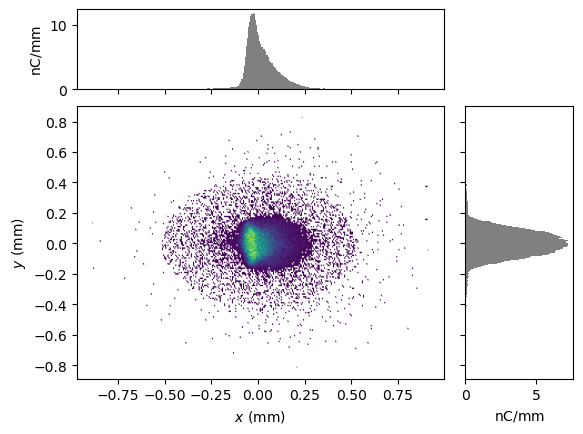

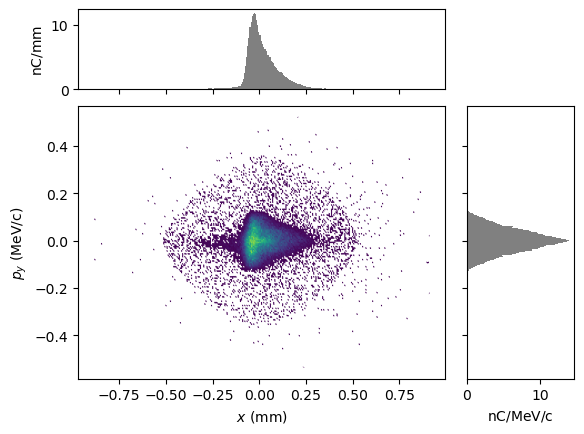

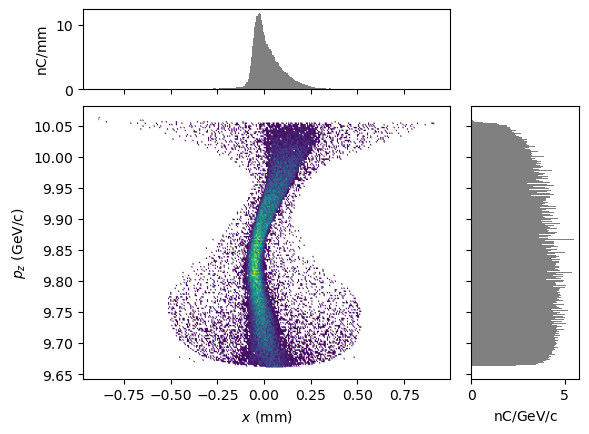

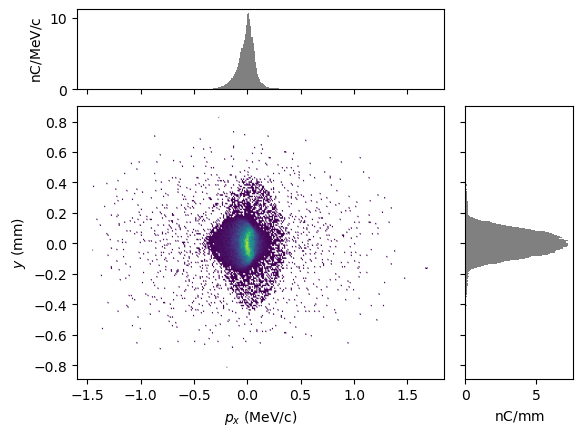

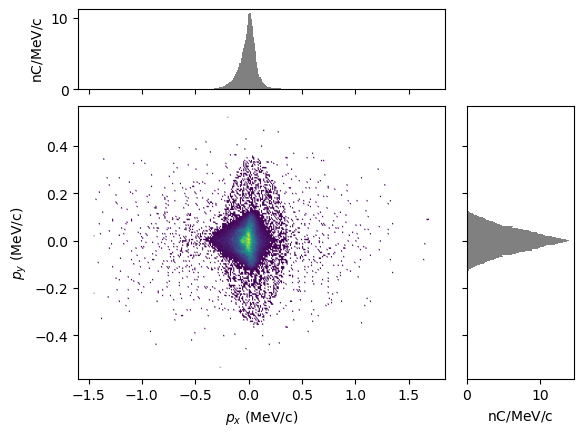

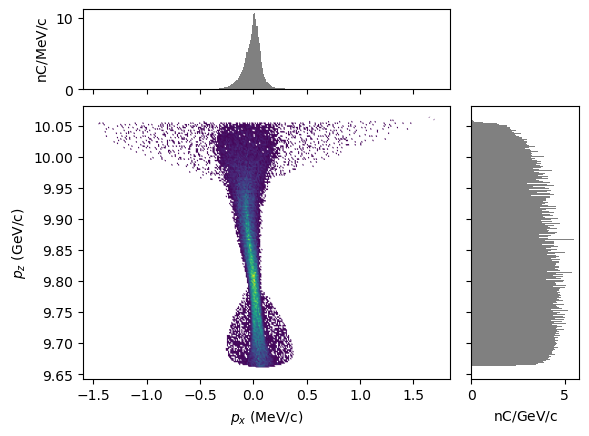

MFFF


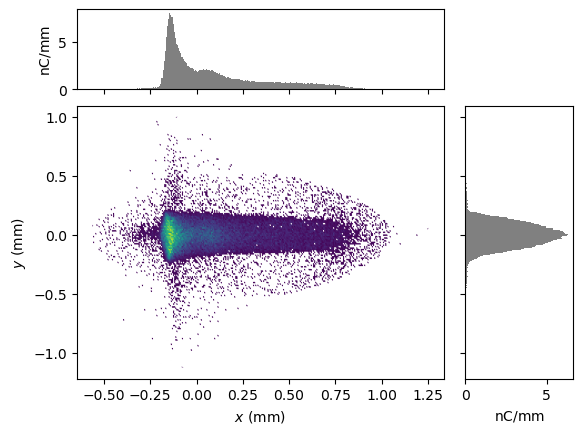

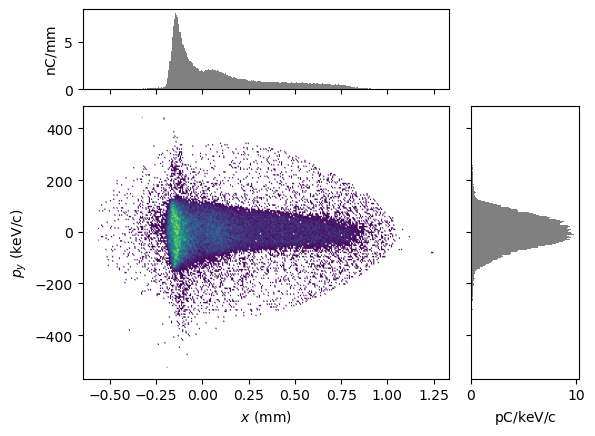

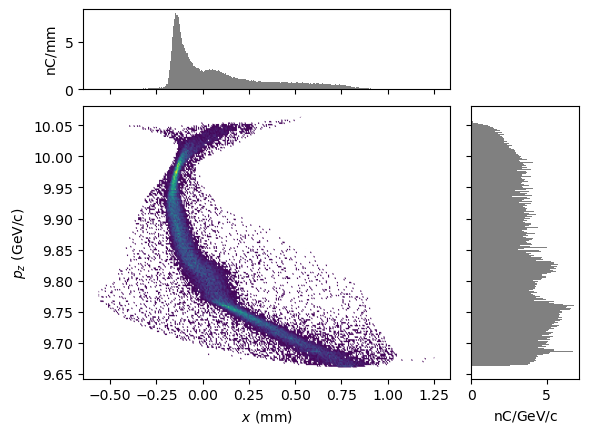

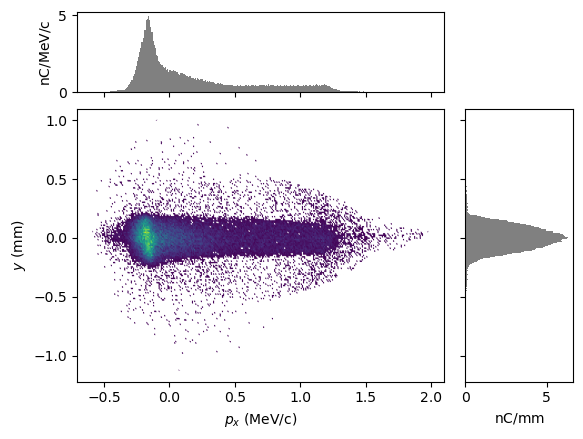

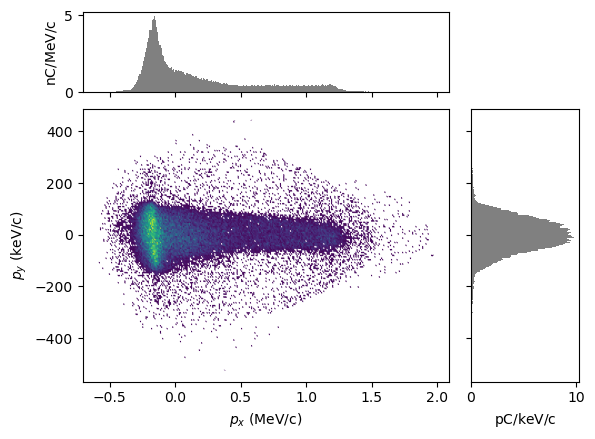

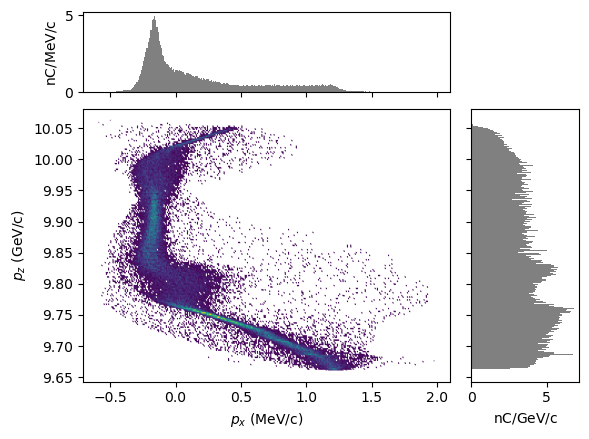

PENT


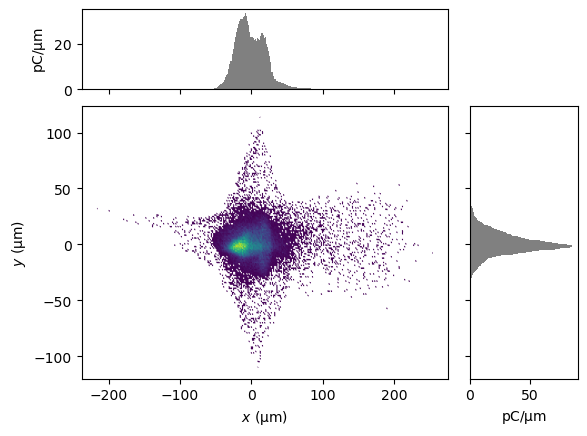

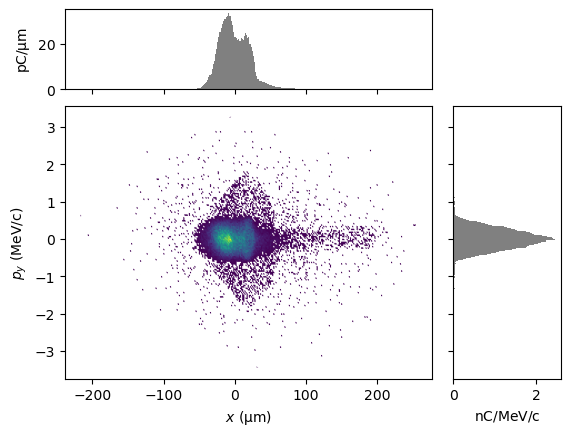

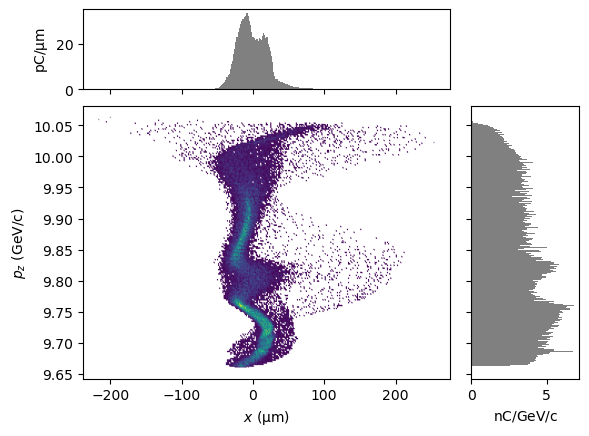

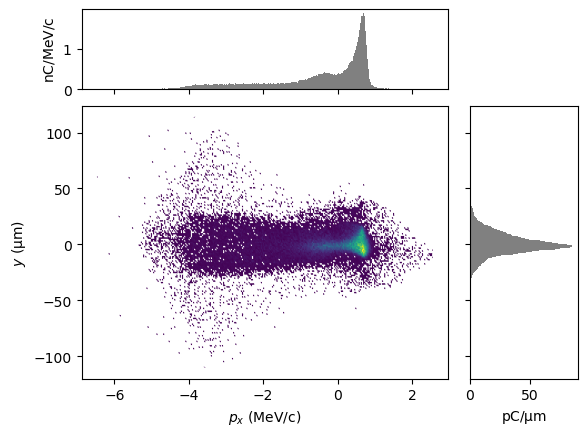

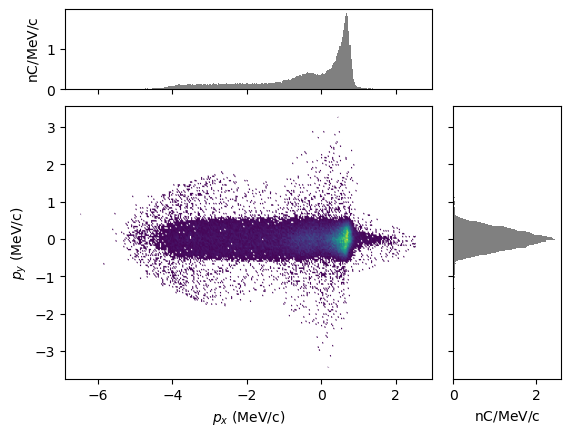

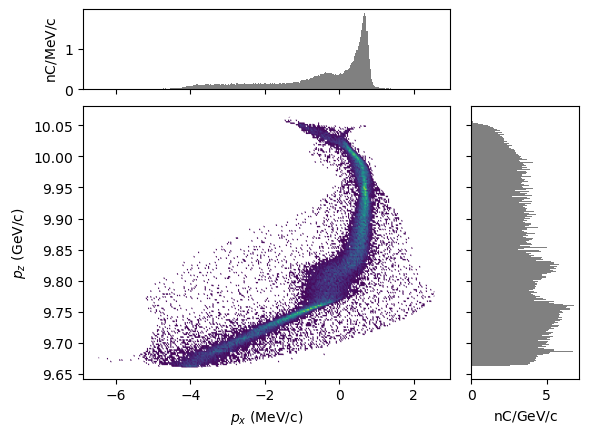

DTOTR


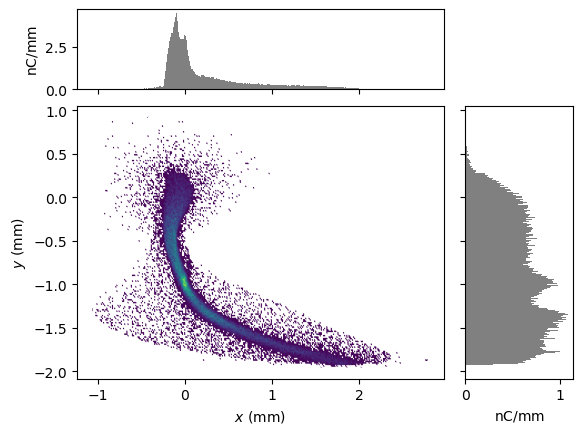

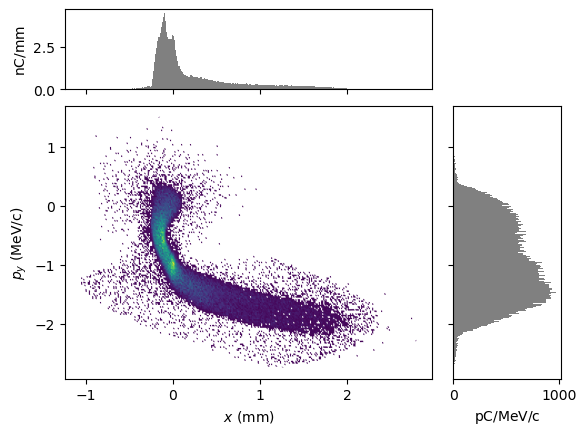

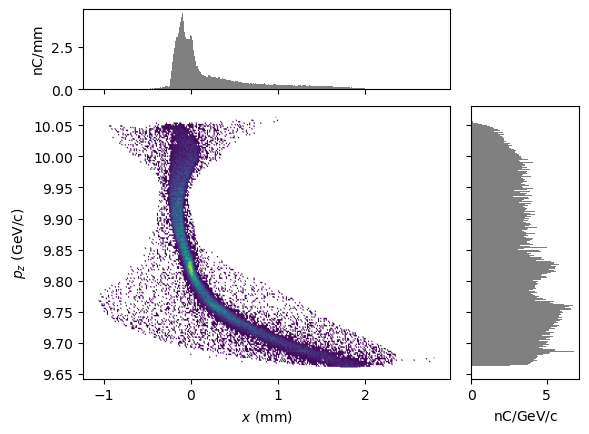

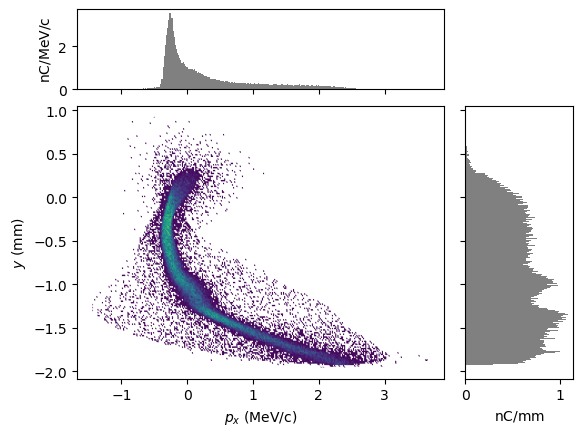

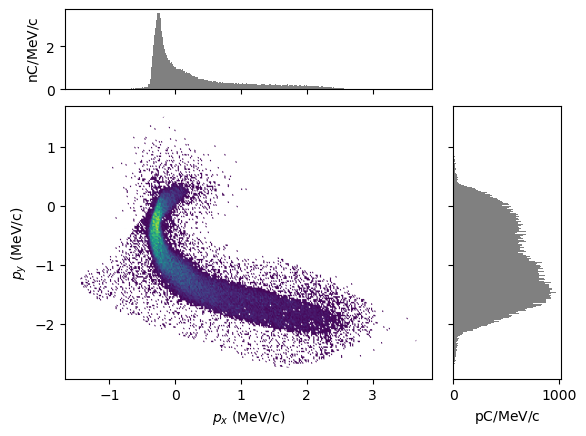

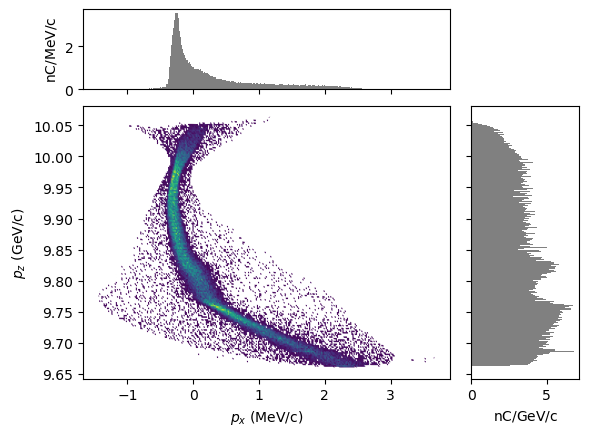

In [5]:
PActive = P_PENT
for key in allBeams.keys():
    print(key)
    
    PActive = allBeams[key]

    display(plotMod(PActive, 'x', 'y',  bins=300))
    display(plotMod(PActive, 'x', 'py',  bins=300))
    display(plotMod(PActive, 'x', 'pz',  bins=300))
    
    display(plotMod(PActive, 'px', 'y',  bins=300))
    display(plotMod(PActive, 'px', 'py',  bins=300))
    display(plotMod(PActive, 'px', 'pz',  bins=300))